<a href="https://colab.research.google.com/github/JOteng15/CODSOFT/blob/main/Movie_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Movie rating analysis**
Problem statement:
* Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
* The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
* Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

#Importing libraries

In [ ]:
#Reading data and preprocessing
import pandas as pd
import numpy as np
#Data visualisation
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
#Model training and building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#Model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("India.csv",encoding='ISO-8859-1')

In [ ]:
data = df.copy()

In [ ]:
df.shape

(15509, 10)

In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


#Data preprocessing


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
print(data.isnull().sum())#Quite a lot of missing values
print("Missing values cover {}% of the data".format(int(round(sum(data.isnull().sum())/(data.shape[0]*data.shape[1]),2)*100)))

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
Missing values cover 22% of the data


In [ ]:
lst = [str(round(data[i].isnull().sum()/15509 * 100,2))+"%" for i in data.columns]
m_data = pd.DataFrame({"variable":data.columns,"percent":lst})

In [ ]:
m_data

,variable,percent
0,Name,0.0%
1,Year,3.4%
2,Duration,53.32%
3,Genre,12.1%
4,Rating,48.94%
5,Votes,48.93%
6,Director,3.39%
7,Actor 1,10.43%
8,Actor 2,15.37%
9,Actor 3,20.27%


In [ ]:
data = data.dropna()

In [ ]:
data.shape

(5659, 10)

In [ ]:
data["Year"] = data["Year"].str.replace("(","",).str.replace(")","").astype(int)
data["Duration"] = data["Duration"].str.replace(" min","").astype(float)
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)

<ipython-input-126-80646193123a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-80646193123a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-80646193123a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
series = data[["Director","Rating"]]
series = series.groupby(["Director"]).mean().reset_index()


#Data visualisation

<Axes: >

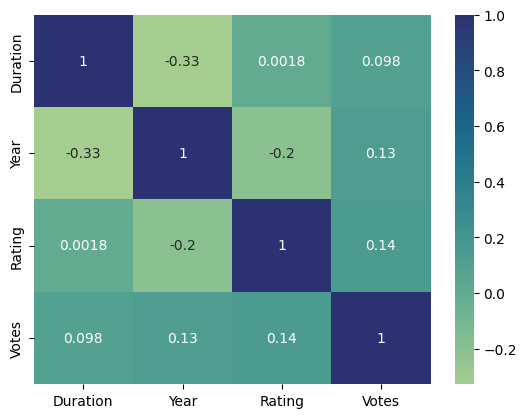

In [ ]:
sns.heatmap(data[["Duration","Year","Rating","Votes"]].corr(),annot = True, cmap = "crest")


In [ ]:
direc_df = data[["Director","Rating"]]


The least rated director is Mahesh Bhatt.

The most rated director is Saif Ali Sayeed.

In [ ]:
h = direc_df.groupby(["Rating"])
h.first()

,Director
Rating,
1.1,Mahesh Bhatt
1.4,Jagdish A. Sharma
1.6,Sachindra Sharma
1.7,Ajay Chandhok
1.8,Sajid Khan
...,...
9.2,Tom Alter
9.3,Rahul Mallick
9.4,Munni Pankaj


In [ ]:
s = data.groupby('Director')['Rating'].transform('mean').reset_index()

The average rating was the highest during 1940-1960.

In [ ]:
#Mean ratings per year
df_1 = data[["Year","Rating"]]
df_1 = df_1.groupby(["Year"])["Rating"].mean().reset_index()

fig = px.line(df_1, x='Year', y='Rating',color_discrete_sequence = ['#0d0887'] )

fig.update_layout(title='Average Rating by Year', xaxis_title='Year', yaxis_title='Average Rating', xaxis=dict(showgrid=True), yaxis=dict(showgrid=True), plot_bgcolor='white')

fig.show()

#Outlier detection

Text(0.5, 1.0, 'Rating distribution')

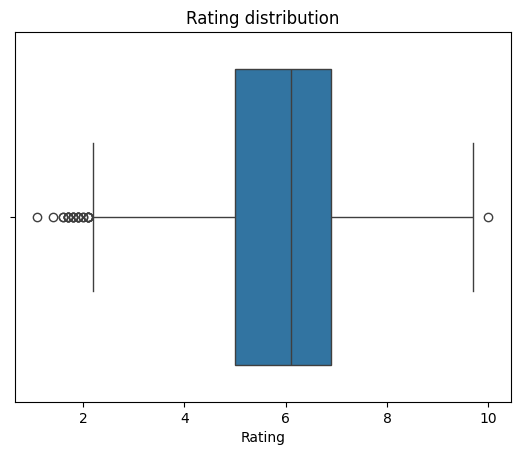

In [ ]:
sns.boxplot(data = data, x = "Rating")
plt.title("Rating distribution")

In [ ]:
Q1 = data["Rating"].quantile(0.25)
Q3 = data["Rating"].quantile(0.75)
IQR = Q3-Q1
new_df  = data[(data["Rating"] > Q1 - 1.5 * IQR) & (data["Rating"] < Q3 + 1.5 * IQR)]


In [ ]:
genre_avg_rating = data.groupby('Genre')['Rating'].transform('mean')
new_df['Genre_avg'] = genre_avg_rating

dir_avg_rating = data.groupby('Director')['Rating'].transform('mean')
new_df['Director_avg'] = dir_avg_rating

a1_avg_rating = data.groupby('Actor 1')['Rating'].transform('mean')
new_df['Actor1_avg'] = a1_avg_rating

a2_avg_rating = data.groupby('Actor 2')['Rating'].transform('mean')
new_df['Actor2_avg'] = a2_avg_rating

a3_avg_rating = data.groupby('Actor 3')['Rating'].transform('mean')
new_df['Actor3_avg'] = a3_avg_rating

<ipython-input-141-ad261fdfacb1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-ad261fdfacb1>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-ad261fdfacb1>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-ad2

#Training data and model evaluation

In [ ]:
X = new_df[[ 'Year', 'Votes', 'Duration',"Actor1_avg","Actor2_avg","Actor3_avg","Genre_avg",]]
y = new_df['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [ ]:
models = {"Random Forest": RandomForestRegressor(),
        "Logistic Regression":LinearRegression()}


arr = []

for name,model in models.items():
  current_model = model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(name)
  print("R2:", "%.3f" % r2_score(y_test,y_pred))
  print("MSE:", "%.3f" % mean_squared_error(y_test,y_pred))
  print("\n")


Random Forest
R2: 0.804
MSE: 0.357


Logistic Regression
R2: 0.741
MSE: 0.472




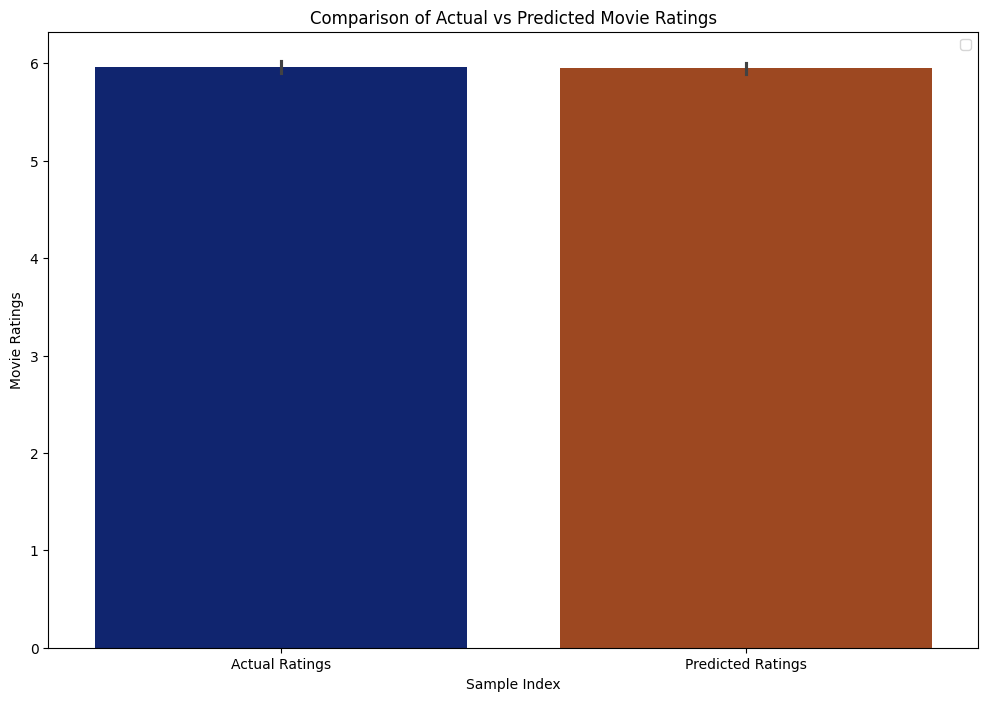

In [ ]:
# Create a DataFrame for actual and predicted ratings
reg = RandomForestRegressor().fit(X_train,y_train)
y_pred = reg.predict(X_test)
result_df = pd.DataFrame({'Actual Ratings': y_test, 'Predicted Ratings': y_pred})

# Plot the actual and predicted ratings
plt.figure(figsize=(12, 8))
sns.barplot(data=result_df, palette='dark')

plt.xlabel('Sample Index')
plt.ylabel('Movie Ratings')
plt.title('Comparison of Actual vs Predicted Movie Ratings')
plt.legend(loc='upper right')
plt.show()

Random Forest performs the best. The MSE slightly indicates that the model has not underfit, nor has it overfit the data. Hence it is reasonable to suggest the model is suitable. In the future, we could be more rigorous and expand our model choices, and perhaps perform hyperparameter tuning. A nice correspondence to this project is to do sentiment analysis on movie reviews, which could be insightful on the preferences for people in general.